<a href="https://colab.research.google.com/github/GitAd7/Machine-Learning/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import io

# Uploading csv file 

In [18]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


# Problem Statement
* We have been given a dataset that describes the stock price of TESLA company from 2010-2020. Now, on the basis of given features we have to predict the price of stock.

# Creating a DataFrame

In [19]:
df = pd.read_csv('TSLA.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# EDA - Exploratory Data Analysis

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [24]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [26]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [27]:
df.shape

(2416, 7)

In [29]:
df.nunique()

Date         2416
Open         2132
High         2128
Low          2136
Close        2225
Adj Close    2225
Volume       2391
dtype: int64

In [31]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [33]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


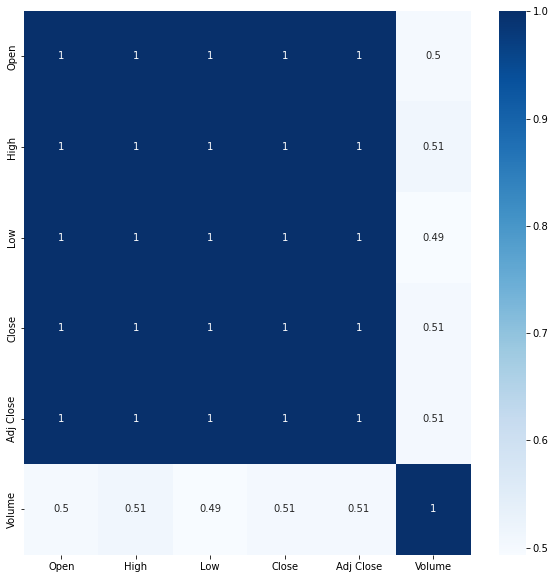

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True, cmap = 'Blues')

In [41]:
# Since date is no used for our ML, we will remove it from the dataset
df = df.drop(['Date'], axis=1)

In [42]:
df.shape

(2416, 6)

# Machine Learning - Linear Regression

In [43]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [46]:
X = np.array(df.drop(['Close', 'Adj Close'], axis =1))
y = np.array(df.Close)

In [48]:
X,y

(array([[1.90000000e+01, 2.50000000e+01, 1.75400010e+01, 1.87663000e+07],
        [2.57900010e+01, 3.04200000e+01, 2.32999990e+01, 1.71871000e+07],
        [2.50000000e+01, 2.59200000e+01, 2.02700000e+01, 8.21880000e+06],
        ...,
        [6.32419983e+02, 6.50880005e+02, 6.18000000e+02, 2.90057000e+07],
        [6.40000000e+02, 6.53000000e+02, 6.32520020e+02, 1.57193000e+07],
        [6.73690002e+02, 7.86140015e+02, 6.73520020e+02, 4.70650000e+07]]),
 array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
        780.      ]))

# Splitting the Data- Training set and Test Set

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [50]:
len(X_train)

1691

In [51]:
len(X_test)

725

# Choosing the Model

In [53]:
model = LinearRegression()

# Train/Fit the data

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.intercept_

-0.05744747824070373

In [56]:
model.coef_

array([-6.08118302e-01,  8.62532244e-01,  7.45029018e-01, -1.21855755e-08])

# Prediction

In [59]:
y_test

array([558.02002 ,  20.450001,  29.799999, 225.789993, 280.690002,
        19.59    , 281.190002, 310.220001, 299.019989, 230.009995,
       344.970001, 299.920013, 150.100006, 323.410004,  19.15    ,
       255.990005, 335.070007, 220.169998,  27.530001, 375.339996,
       306.850006, 241.220001,  21.059999, 178.380005, 220.679993,
       269.149994, 178.699997, 227.169998, 308.170013, 145.429993,
        22.940001, 354.309998, 230.75    ,  29.370001, 185.850006,
        28.57    , 365.709991,  33.130001, 243.130005, 171.539993,
       249.449997, 193.149994, 277.920013, 140.720001, 208.720001,
        28.17    , 347.160004,  34.5     , 350.480011,  38.98    ,
       267.869995, 251.820007, 137.949997, 280.950012, 339.600006,
        21.84    , 242.809998, 357.420013,  28.450001,  29.51    ,
        31.33    , 204.639999,  33.639999, 260.170013, 348.170013,
        20.1     , 151.160004, 247.740005, 336.220001,  24.75    ,
       203.559998,  21.77    , 231.630005, 241.800003, 229.300

In [61]:
y_pred = model.predict(X_test)

In [62]:
y_pred

array([558.80966971,  20.3593816 ,  29.51489419, 226.79393743,
       280.01109936,  19.64195065, 282.01454708, 309.26625765,
       296.99851626, 229.22977848, 341.61720465, 299.3217432 ,
       149.47393783, 323.49453307,  19.13194345, 257.89497208,
       341.13112958, 215.04273708,  27.25607226, 370.18345817,
       305.53992018, 240.17499467,  21.00096999, 177.35199186,
       218.39521852, 269.74956753, 176.98120601, 229.48868596,
       307.34962554, 145.78352344,  22.86746933, 352.94156297,
       227.59332225,  28.86215497, 184.11627777,  28.52017998,
       369.18242926,  32.75253643, 241.3256342 , 173.21738099,
       248.41045137, 193.93568526, 280.57436399, 140.88051416,
       207.20389735,  28.00952371, 346.95731553,  33.9895579 ,
       347.28075279,  39.19189919, 267.77060233, 254.85984544,
       136.52694655, 285.57653061, 337.09916161,  21.61270258,
       243.38282957, 357.08733668,  28.43098636,  28.98111198,
        31.12317047, 205.23384857,  33.62589202, 258.05

# Testing the Model Performance

In [63]:
model.score(X_test, y_test)

0.999718771389402

In [64]:
r2_score(y_test, y_pred)

0.999718771389402

In [65]:
mean_absolute_error(y_test, y_pred)

1.3810625943988948

In [66]:
mean_squared_error(y_test, y_pred)

4.354106675870862

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.0866496293989707

Text(0.5, 1.0, 'Actual Closing v/s Predicted Closing')

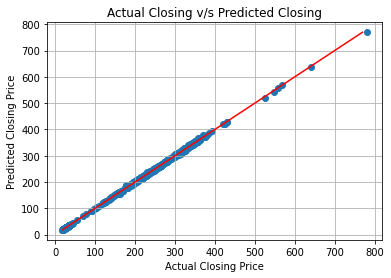

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid()
plt.plot([min(y_test), max(y_pred)], [min(y_pred), max(y_pred)], color = 'Red')
plt.title('Actual Closing v/s Predicted Closing')